In [23]:
import pandas as pd
import numpy as np

In [38]:
data = np.load('./data/house_price.npz', encoding='ASCII', allow_pickle=True)
data

(1, 5)
(414, 5)


In [41]:
columns = data['arr_0'][0].astype(str)
df = pd.DataFrame(data['arr_1'], columns=columns)

In [42]:
df.head(5)

交易年份  房屋年龄  离地铁站的距离  附近的商店个数  单位面积的房价
0  2018.0  16.0    84.88     10.0   5685.0
1  2018.0   9.8   306.59      9.0   6330.0
2  2020.0   6.7   561.98      5.0   7095.0
3  2020.0   6.7   561.98      5.0   8220.0
4  2018.0   2.5   390.57      5.0   6465.0

In [51]:
from pyecharts import options as opts
from pyecharts.charts import Scatter

scatter = Scatter()
scatter.add_xaxis(df['离地铁站的距离'].tolist())
scatter.add_yaxis("房价",
                  df['单位面积的房价'].tolist(),
                  label_opts=opts.LabelOpts(is_show=False))

scatter.set_global_opts(
    title_opts=opts.TitleOpts(title="距离地铁站与单位面积房价的关系"),
    xaxis_opts=opts.AxisOpts(name="距离（米）", type_="value"),
    yaxis_opts=opts.AxisOpts(name="单位面积房价（元）"),
    tooltip_opts=opts.TooltipOpts(is_show=True),
    visualmap_opts=opts.VisualMapOpts(
        type_="size",
        max_=df['单位面积的房价'].max(),
        range_size=[5, 20]
    ))

scatter.render_notebook()

In [54]:
from pyecharts.charts import Bar

bins = [0, 3, 7, 10]
labels = ['较少', '中等', '较多']
df['商店分组'] = pd.cut(df['附近的商店个数'], bins=bins, labels=labels, right=True)

grouped = df.groupby('商店分组')['单位面积的房价'].mean().round(2)

bar = Bar()
bar.add_xaxis(grouped.index.tolist())
bar.add_yaxis("平均房价", grouped.values.tolist(), label_opts=opts.LabelOpts(is_show=True))

bar.set_global_opts(
    title_opts=opts.TitleOpts(title="不同商店数量区间的平均房价"),
    xaxis_opts=opts.AxisOpts(name="商店数量分组", type_="category"),
    yaxis_opts=opts.AxisOpts(name="平均单位面积房价（元）"))

bar.render_notebook()

In [55]:
from pyecharts.charts import Pie

year_count = df['交易年份'].value_counts().sort_index()

pie = Pie()
pie.add(
    series_name="交易年份",
    data_pair=[(str(year), int(count)) for year, count in year_count.items()],
    radius=["30%", "70%"],  # 可选：环形饼图
    label_opts=opts.LabelOpts(formatter="{b}: {d}%")
)

pie.set_global_opts(
    title_opts=opts.TitleOpts(title="各年份房屋交易分布"),
    legend_opts=opts.LegendOpts(orient="vertical", pos_top="15%", pos_left="2%")
)
pie.render_notebook()

In [56]:
from pyecharts.charts import Boxplot

features = ['房屋年龄', '离地铁站的距离', '附近的商店个数', '单位面积的房价']

values = [df[f].tolist() for f in features]

box = Boxplot()
box_data = box.prepare_data(values)  # 自动计算五数概括

box.add_xaxis(features)
box.add_yaxis("特征分布", box_data)

box.set_global_opts(
    title_opts=opts.TitleOpts(title="四个特征的箱线图分析"),
    yaxis_opts=opts.AxisOpts(name="数值"),
    xaxis_opts=opts.AxisOpts(name="特征")
)

box.render_notebook()


In [68]:
from sklearn.datasets import load_iris
import pandas as pd

# 加载 & 处理数据集
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['类型'] = iris.target
df['类型'] = df['类型'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df['花萼(cm)'] = df['sepal length (cm)']
df['花瓣(cm)'] = df['petal length (cm)']

In [71]:
from matplotlib import font_manager as fm
import matplotlib as mpl

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
my_font = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = my_font.get_name()
mpl.rcParams['axes.unicode_minus'] = False

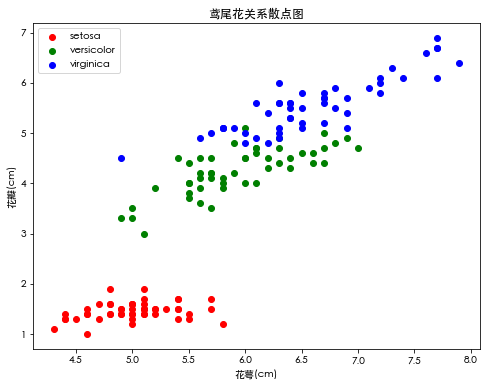

In [74]:
import matplotlib.pyplot as plt

colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

plt.figure(figsize=(8, 6))
for species in df['类型'].unique():
    subset = df[df['类型'] == species]
    plt.scatter(subset['sepal length (cm)'], subset['petal length (cm)'],
                label=species, color=colors[species])

plt.xlabel('花萼(cm)')
plt.ylabel('花瓣(cm)')
plt.title('鸢尾花关系散点图')
plt.legend()
plt.show()


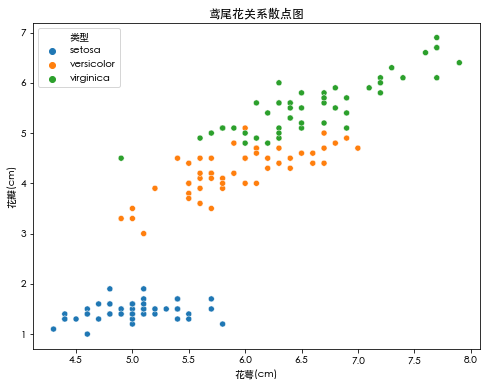

In [75]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='花萼(cm)', y='花瓣(cm)', hue='类型')
plt.title('鸢尾花关系散点图')
plt.show()
